## Plots of time series for BY and BKY

In [1]:
include("src/bansal_yaron_state_process.jl")

sim_consumption (generic function with 1 method)

In [2]:
using QuantEcon

#### Bansal Yaron Parameters

In [3]:
sv_by = StochasticVolatilityBY()

StochasticVolatility{Float64}(0.979, 0.044, 0.987, 7.9092e-7, 2.3e-6)

In [4]:
discretize_sv(sv_by, 10, 12)

([-0.00302931 -0.00247852 … 0.00596631 0.00729216; 0.00423182 0.00423182 … 0.0101868 0.0101868], [0.839624 0.0980056 … 3.67216e-39 3.54244e-42; 0.0089096 0.840569 … 3.14601e-37 3.33833e-40; … ; 3.33833e-40 3.14601e-37 … 0.840569 0.0089096; 3.54244e-42 3.67216e-39 … 0.0980056 0.839624])

In [5]:
sv_bky = StochasticVolatilityBKY()

StochasticVolatility{Float64}(0.975, 0.038, 0.999, 5.184e-8, 2.8e-6)

In [33]:
T = 8000

8000

In [34]:
σ_by, z_by, c_by = sim_consumption(sv_by, ts_length=T);

In [35]:
σ_bky, z_bky, c_bky = sim_consumption(sv_bky, ts_length=T);

#### Now plots

In [36]:
using PyPlot
plt = PyPlot

PyPlot

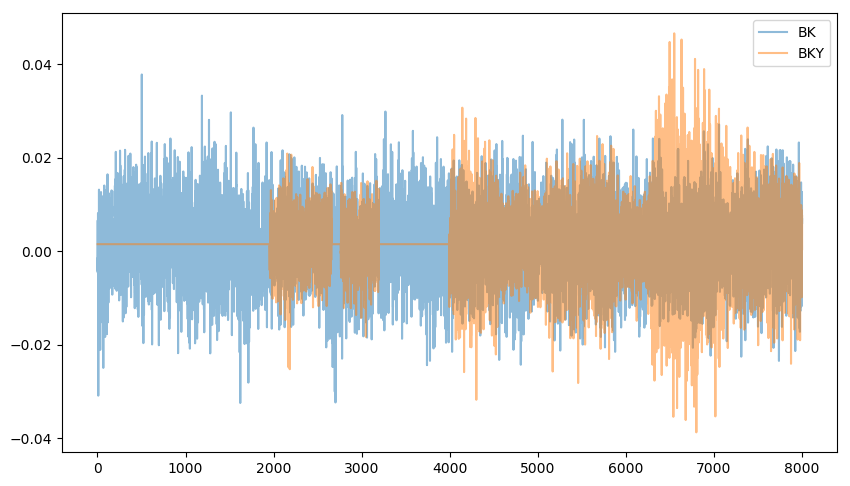

In [37]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax[:plot](1:T, c_by, label="BK", alpha=0.5)
ax[:plot](1:T, c_bky, label="BKY", alpha=0.5)
ax[:legend]()

plt.show()

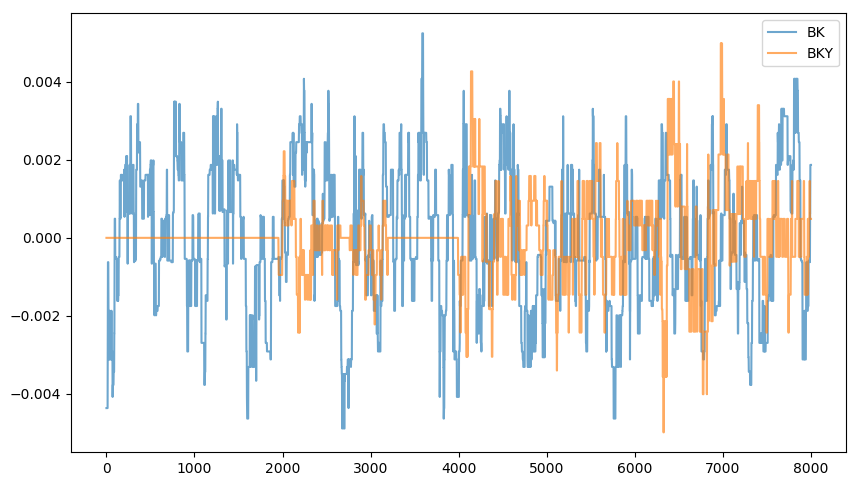

In [38]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax[:plot](1:T, z_by, label="BK", alpha=0.65)
ax[:plot](1:T, z_bky, label="BKY", alpha=0.65)
ax[:legend]()

plt.show()

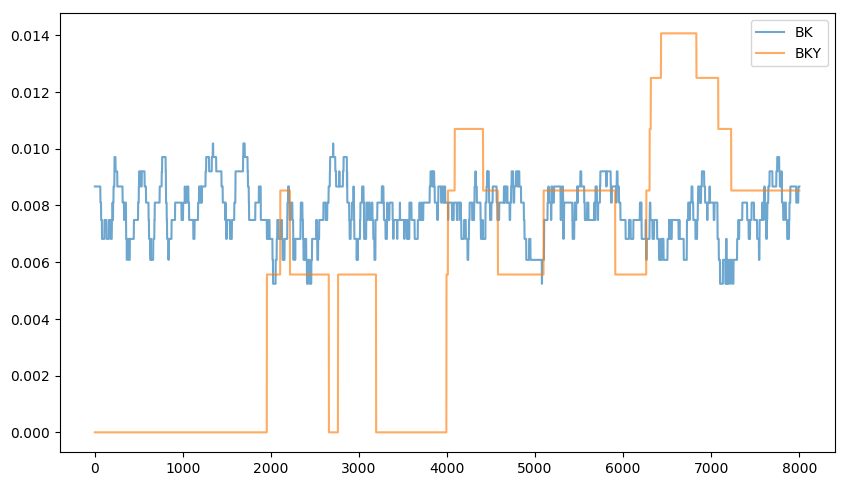

In [39]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax[:plot](1:T, σ_by, label="BK", alpha=0.65)
ax[:plot](1:T, σ_bky, label="BKY", alpha=0.65)
ax[:legend]()

plt.show()

### Simulation without discretization for comparison

In [40]:
ρ, ϕ_z, v, d, ϕ_σ = sv_by.ρ, sv_by.ϕ_z, sv_by.v, sv_by.d, sv_by.ϕ_σ

(0.979, 0.044, 0.987, 7.9092e-7, 2.3e-6)

In [41]:
σ = Array{Float64}(T)
z = Array{Float64}(T)
c = Array{Float64}(T);

In [42]:
σ[1] = σ_by[1]
z[1] = z_by[1]

-0.00436579244293492

In [43]:
for t in 1:(T-1)
    c[t] = 0.0015 + z[t] + σ[t] * randn()
    z[t+1] = ρ * z[t] + ϕ_z * σ[t] * randn()
    s = v * σ[t]^2 + d + ϕ_σ * randn()
    if s < 0
        s = 1e-8
    end
    σ[t+1] = sqrt(s)
end

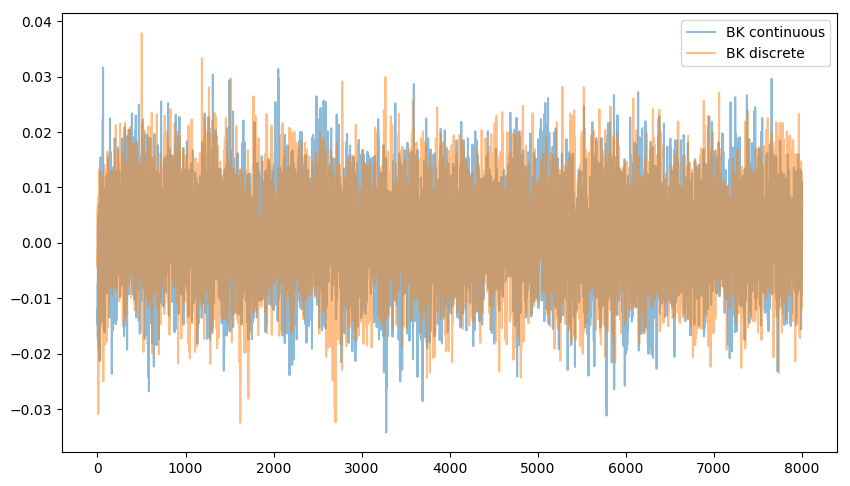

In [44]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax[:plot](1:T, c, label="BK continuous", alpha=0.5)
ax[:plot](1:T, c_by, label="BK discrete", alpha=0.5)
ax[:legend]()

plt.show()